In [2]:
import numpy as np 
import pandas as pd
import torch
from local.dagmm.data_loader import *
from local.dagmm.main import *
from tqdm import tqdm

In [3]:
data = pd.read_csv("kddcup.data_10_percent", header=None,names=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'type'])

In [3]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.00,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0,normal.


In [4]:
data.loc[data["type"] != "normal.", 'type'] = 0
data.loc[data["type"] == "normal.", 'type'] = 1

In [5]:
one_hot_protocol = pd.get_dummies(data["protocol_type"])
one_hot_service = pd.get_dummies(data["service"])
one_hot_flag = pd.get_dummies(data["flag"])

data = data.drop("protocol_type",axis=1)
data = data.drop("service",axis=1)
data = data.drop("flag",axis=1)
    
data = pd.concat([one_hot_protocol, one_hot_service,one_hot_flag, data],axis=1)
data.head()

,icmp,tcp,udp,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type
0,0,1,0,0,0,0,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,1
1,0,1,0,0,0,0,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1
2,0,1,0,0,0,0,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
3,0,1,0,0,0,0,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
4,0,1,0,0,0,0,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,1


In [6]:
proportions = data["type"].value_counts()
print(proportions)
print("Anomaly Percentage",proportions[1] / proportions.sum())

0    396743
1     97278
Name: type, dtype: int64
Anomaly Percentage 0.19691065764410826


In [7]:
cols_to_norm = ["duration", "src_bytes", "dst_bytes", "wrong_fragment", "urgent", 
            "hot", "num_failed_logins", "num_compromised", "num_root", 
            "num_file_creations", "num_shells", "num_access_files", "count", "srv_count", 
            "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", 
            "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", 
            "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", 
            "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate" ]

# data.loc[:, cols_to_norm] = (data[cols_to_norm] - data[cols_to_norm].mean()) / data[cols_to_norm].std()
min_cols = data.loc[data["type"]==0 , cols_to_norm].min()
max_cols = data.loc[data["type"]==0 , cols_to_norm].max()

data.loc[:, cols_to_norm] = (data[cols_to_norm] - min_cols) / (max_cols - min_cols)

In [8]:
np.savez_compressed("kdd_cup",kdd=data.values)

In [9]:
class hyperparams():
    def __init__(self, config):
        self.__dict__.update(**config)
defaults = {
    'lr' : 1e-4,
    'num_epochs' : 200,
    'batch_size' : 1024,
    'gmm_k' : 4,
    'lambda_energy' : 0.1,
    'lambda_cov_diag' : 0.005,
    'pretrained_model' : None,
    'mode' : 'train',
    'use_tensorboard' : False,
    'data_path' : 'kdd_cup.npz',

    'log_path' : './dagmm/logs',
    'model_save_path' : './dagmm/models',
    'sample_path' : './dagmm/samples',
    'test_sample_path' : './dagmm/test_samples',
    'result_path' : './dagmm/results',

    'log_step' : 194//4,
    'sample_step' : 194,
    'model_save_step' : 194,
}

In [10]:
defaults

{'lr': 0.0001,
 'num_epochs': 200,
 'batch_size': 1024,
 'gmm_k': 4,
 'lambda_energy': 0.1,
 'lambda_cov_diag': 0.005,
 'pretrained_model': None,
 'mode': 'train',
 'use_tensorboard': False,
 'data_path': 'kdd_cup.npz',
 'log_path': './dagmm/logs',
 'model_save_path': './dagmm/models',
 'sample_path': './dagmm/samples',
 'test_sample_path': './dagmm/test_samples',
 'result_path': './dagmm/results',
 'log_step': 48,
 'sample_step': 194,
 'model_save_step': 194}

In [11]:
labels = data['type']

In [12]:
features = data.loc[:, data.columns!='type']

In [13]:
N, D = features.shape

In [14]:
N, D

(494021, 118)

In [15]:
normal_data = features[labels==1]
normal_labels = labels[labels==1]

In [16]:
N_normal = normal_data.shape[0]
N_normal

97278

In [17]:
attack_data = features[labels==0]
attack_labels = labels[labels==0]

In [18]:
N_attack = attack_data.shape[0]

In [19]:
randIdx = np.arange(N_attack)

In [20]:
randIdx

array([     0,      1,      2, ..., 396740, 396741, 396742])

In [21]:
hyperparams(defaults).data_path

'kdd_cup.npz'

Elapsed 0:00:12.075836/0:00:04.122441 -- 0:26:43.629372 , Epoch [2/200], Iter [96/194], lr 0.0001, total_loss: 1299.4968, sample_energy: -4.0970, recon_error: 0.1021, cov_diag: 259960.9062


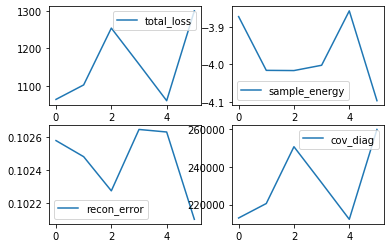

 51%|█████     | 99/194 [00:04<00:05, 17.10it/s]

phi tensor([0.2418, 0.3002, 0.2910, 0.1669], device='cuda:0') mu tensor([[-0.2989,  1.1267, -0.0133],
        [-0.2989,  1.1265, -0.0130],
        [-0.2988,  1.1262, -0.0123],
        [-0.2988,  1.1262, -0.0120]], device='cuda:0') cov tensor([[[ 1.5299e-05, -4.6054e-05,  1.6573e-04],
         [-4.6054e-05,  6.8774e-04, -1.9344e-03],
         [ 1.6573e-04, -1.9344e-03,  5.7354e-03]],

        [[ 1.5498e-05, -4.7672e-05,  1.6891e-04],
         [-4.7672e-05,  6.9698e-04, -1.9638e-03],
         [ 1.6891e-04, -1.9638e-03,  5.8021e-03]],

        [[ 1.5598e-05, -4.8814e-05,  1.7190e-04],
         [-4.8814e-05,  7.0548e-04, -1.9878e-03],
         [ 1.7190e-04, -1.9878e-03,  5.8672e-03]],

        [[ 1.6787e-05, -4.5896e-05,  1.7045e-04],
         [-4.5896e-05,  7.1388e-04, -1.9959e-03],
         [ 1.7045e-04, -1.9959e-03,  5.8862e-03]]], device='cuda:0')


 68%|██████▊   | 132/194 [00:05<00:02, 23.16it/s]


KeyboardInterrupt: 

In [23]:
solver = main(hyperparams(defaults))